
Implement a neural network-based predistorter for the linearization of high power amplifier. 
Show by simulations how the activation function type (ReLU/sigmoid) and the number of network layers impact the nonlinear noise suppression.


R. Hongyo, Y. Egashira, T. M. Hone and K. Yamaguchi, "Deep Neural Network-Based Digital Predistorter for Doherty Power Amplifiers," in  in IEEE Microwave and Wireless Components Letters, vol. 29, no. 2, pp. 146-148, Feb. 2019, doi: 10.1109/LMWC.2018.2888955. 

[[publication link]](https://www.researchgate.net/publication/341539322_Convolutional_Neural_Network_for_Behavioral_Modeling_and_Predistortion_of_Wideband_Power_Amplifiers)




Baseline grade (8/10) requirements:
- Provide background material (motivation, theory, existing methods of solution)
- Demonstrate your numerical implementation
- Analyze results (validate your numerical solution, compare with theory and other existing methods of solution)
- Answer questions
        
Higher grades (9,10) are usually given for some of the following:
- An original, interesting project topic (understandable by a non-expert)
- An original approach/solution
- An extensive analysis of the topic / substantial amount of work / implementation involving advanced technologies
- An outstanding presentation

 

**SOURCES**
1. https://github.com/lab-emi/OpenDPD
https://arxiv.org/html/2401.08318v2/#S2

2. disser https://open.fau.de/server/api/core/bitstreams/e5af6398-60b8-4f08-89df-c39203dd37c6/content

2. book High performance Deep Learning based Digital Pre-distorters for RF Power Amplifiers
https://vtechworks.lib.vt.edu/server/api/core/bitstreams/5e0ff5c4-124b-4f70-9b27-b259ffd89bd8/content

3. paper Linearizing Power Amplifiers Using Digital Predistortion, EDA Tools and Test Hardware
http://www.summittechmedia.com/highfreqelec/Apr04/HFE0404_Stapleton.pdf

4. paper Deep Neural Network-Based Digital Pre-Distortion for High Baudrate Optical Coherent Transmission
https://opg.optica.org/directpdfaccess/6ee808be-bdb2-4822-a1d907d1c0b1c715_469680/jlt-40-3-597.pdf?da=1&id=469680&seq=0&mobile=no

5. paper Low-Complexity Adaptive Digital Predistortion with Meta-Learning based Neural Network
https://cea.hal.science/cea-03837858/file/Low_Complexity_Digital_Predistorsion_based_on_Neural_Networks%20(1).pdf

6. paper Bandwidth-Scalable Digital Predistortion of Active Phased Array Using Transfer Learning Neural Network https://vbn.aau.dk/ws/portalfiles/portal/536331830/Bandwidth_Scalable_Digital_Predistortion_of_Active_Phased_Array_Using_Transfer_Learning_Neural_Network.pdf 

7. activation functions
https://www.v7labs.com/blog/neural-networks-activation-functions

# 1. Literature Review

    Study Relevant Papers: Begin by thoroughly reviewing the paper titled "Convolutional Neural Network for Behavioral Modeling and Predistortion of Wideband Power Amplifiers" as well as other relevant literature on neural networks in predistortion.
    Identify Key Concepts: Focus on understanding the architecture of neural networks used for predistortion, particularly the types of activation functions (ReLU, sigmoid) and their effects.

# 2. Project Objectives

    Objective: To create a neural network model that serves as a predistorter for HPAs and to evaluate how varying the activation function type and number of layers affects nonlinear noise suppression.

# 3. Data Collection

Firstly, we will generate an artificial dataset to develop neural models. Afterwards we will use [Digital Power Amplifier with 200 MHz OFDM Signals](https://github.com/lab-emi/OpenDPD/tree/main/datasets) dataset from IEEE OpenDPD project.



    Collect Data: Obtain datasets that represent the input-output characteristics of the high power amplifier you are modeling. This could involve measurements from experimental setups or simulations.
    Preprocess Data: Clean and preprocess the data to ensure it is suitable for training a neural network. This may include normalization and splitting into training, validation, and test sets.

# 4. Neural Network Design

    Choose Framework: Select a deep learning framework (e.g., TensorFlow, PyTorch) for implementing the neural network.
    Network Architecture:
        Input Layer: Design an input layer that matches the dimensions of your data.
        Hidden Layers: Experiment with different configurations:
            Vary the number of hidden layers (e.g., 1 to 5 layers).
            Choose between ReLU and sigmoid activation functions for each layer.
        Output Layer: Design an output layer that predicts the desired output (predistorted signal).

# 5. Implementation

Code the Model: Write code to implement the neural network architecture. Below is a basic example in Python using TensorFlow:



In [149]:
!pip --version

pip 24.0 from /home/anita/.local/lib/python3.10/site-packages/pip (python 3.10)


In [153]:
!pip list | grep tensor
!pip list | grep torch

jupyter-tensorboard          0.2.0
safetensors                  0.4.0
tensorboard                  2.10.1
tensorboard-data-server      0.6.1
tensorboard-plugin-wit       1.8.1
tensorflow                   2.10.0
tensorflow-estimator         2.10.0
tensorflow-io-gcs-filesystem 0.27.0
torch                        2.0.1
torchaudio                   0.11.0+cu113
torchvision                  0.15.2


In [154]:
!nvidia-smi

Wed Oct 23 16:59:07 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090 Ti     Off |   00000000:01:00.0  On |                  Off |
|  0%   38C    P8             25W /  460W |     451MiB /  24564MiB |      6%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [132]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time

In [159]:
def set_cuda_device(device_index=0):
    # Check if GPUs are available
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        # Print available GPUs
        print("::: Available GPUs: %d" % len(gpus))
        
        # Check if the specified device index is valid
        if device_index < len(gpus):
            # Set memory growth to avoid allocating all GPU memory at once
            tf.config.experimental.set_memory_growth(gpus[device_index], True)
            print("::: Using GPU %d: %s" % (device_index, gpus[device_index].name))
            print("--------------------------------------------------------------------")
            return gpus[device_index]
        else:
            print("::: Invalid GPU index. Using CPU instead.")
            return tf.device("CPU")
    else:
        print("::: Available GPUs: None")
        print("--------------------------------------------------------------------")
        return tf.device("CPU")

# Set the CUDA device
device = set_cuda_device(device_index=0)  # Change index as needed

::: Available GPUs: None
--------------------------------------------------------------------


## Data Preparation
Collect and preprocess data from HPA. This typically includes input-output pairs where the input is the signal fed into the amplifier and the output is the distorted signal. 

For demonstration purposes create synthetic pseudo-random data.

In [134]:
# Generating synthetic data for demonstration
def generate_data(num_samples):
    # Simulate input signals (I and Q components)
    I = np.random.uniform(-1, 1, num_samples)
    Q = np.random.uniform(-1, 1, num_samples)
    
    # Simulate a simple nonlinear distortion (e.g., cubic nonlinearity)
    output_I = I + 0.5 * I**3 - 0.2 * Q**2
    output_Q = Q + 0.5 * Q**3 - 0.2 * I**2
    return np.column_stack((I, Q)), np.column_stack((output_I, output_Q))

X, y = generate_data(100000)  # Generate 10,000 samples
X.shape, y.shape

((100000, 2), (100000, 2))

In [111]:
# Define the model
model_relu = keras.Sequential([
    layers.Input(shape=(2,)),  # Input shape for I and Q components
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(2)  # Output layer for predistorted I and Q components
])

model_relu.compile(optimizer='adam', loss='mse') 

start = time.time()
history_relu = model_relu.fit(X, y, epochs=120, batch_size=32,validation_split=0.2, verbose=0)
end = time.time()
print('training time = ', end - start)


In [112]:
# Generating new data
X_test_new, y_test_new= generate_data(100)

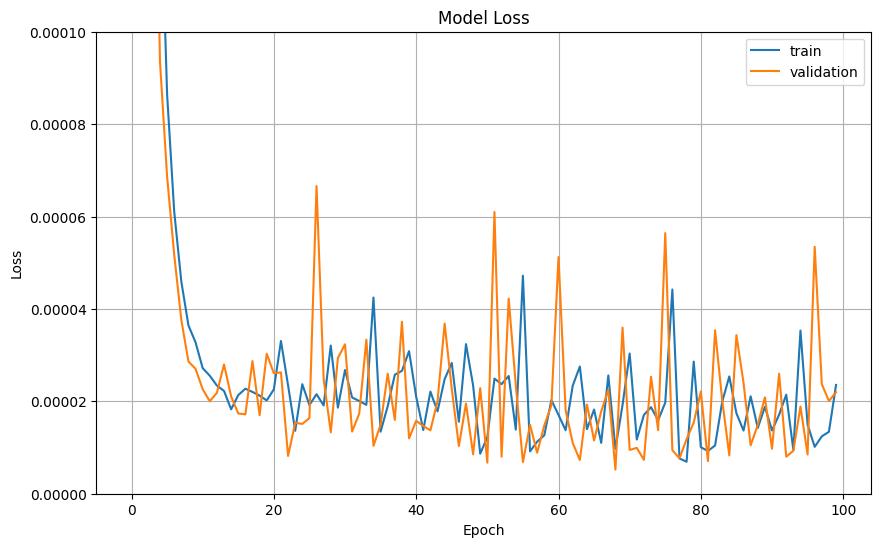

4/4 [==============================] - 0s 908us/step
loss for I: 1.55242614710005e-05 
loss for Q: 2.406262865406461e-05


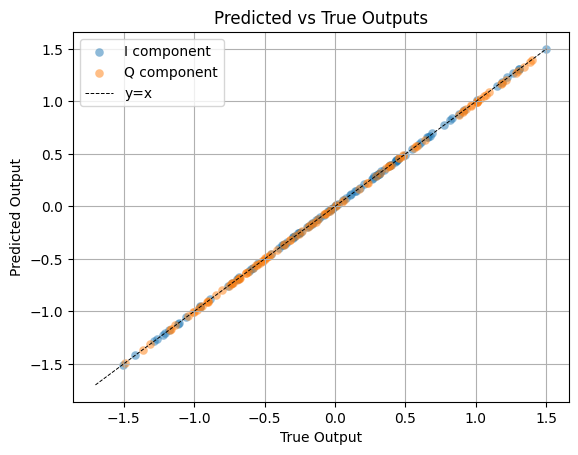

In [113]:
# Plot training history
plt.figure(figsize=(10,6))
plt.plot(history_relu.history['loss'], label='train')
plt.plot(history_relu.history['val_loss'], label='validation')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 0.0001])
plt.grid()
plt.show()

predictions = model_relu.predict(X_test_new)
lossI = keras.losses.mean_squared_error(y_test_new[:, 0], predictions[:, 0])
lossQ = keras.losses.mean_squared_error(y_test_new[:, 1], predictions[:, 1])
print('loss for I:', float(lossI),'\nloss for Q:', float(lossQ))
# Compare predictions with actual outputs
plt.scatter(y_test_new[:, 0], predictions[:, 0], linewidths=0.1, label='I component', alpha=0.5)
plt.scatter(y_test_new[:, 1], predictions[:, 1], linewidths=0.1, label='Q component', alpha=0.5)
plt.plot([-1.7, 1.5], [-1.7, 1.5], 'k--', linewidth=0.7, label='y=x')
plt.title('Model Loss')
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Predicted vs True Outputs')
plt.legend()
plt.grid()
plt.show()


In [129]:
# for sigmoid
def generate_data_normalized(num_samples):
    I = np.random.uniform(-1, 1, num_samples)
    Q = np.random.uniform(-1, 1, num_samples)
    output_I = I + 0.5 * I**3 - 0.2 * Q**2
    output_Q = Q + 0.5 * Q**3 - 0.2 * I**2
    
    # Normalize inputs to [0, 1]
    I_normalized = (I + 1) / 2
    Q_normalized = (Q + 1) / 2
    
    # Normalize outputs to [0, 1]
    output_I_normalized = (output_I - np.min(output_I)) / (np.max(output_I) - np.min(output_I))
    output_Q_normalized = (output_Q - np.min(output_Q)) / (np.max(output_Q) - np.min(output_Q))
    
    return np.column_stack((I_normalized, Q_normalized)), np.column_stack((output_I_normalized, output_Q_normalized))

X, y = generate_data_normalized(10000)  # Generate 10,000 samples


model_sigm = keras.Sequential([
    layers.Input(shape=(2,)), 
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(2) 
])
model_sigm.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss


start = time.time()
history_sigm = model_sigm.fit(X, y, epochs=200, batch_size=32, validation_split=0.2, verbose=0)
end = time.time()
print('training time = ', end - start)

In [130]:
def data_invert_norm(X, y):
    I_normalized = X[:, 0]
    Q_normalized = X[:, 1]
    output_I_normalized = y[:, 0]
    output_Q_normalized = y[:, 1]
    # Invert normalization for inputs
    I = (2 * I_normalized) - 1
    Q = (2 * Q_normalized) - 1

    # Invert normalization for outputs
    output_I = (output_I_normalized * (1.5 + 1.7)) - 1.7
    output_Q = (output_Q_normalized * (1.5 + 1.7)) - 1.7

    return np.column_stack((I, Q)), np.column_stack((output_I, output_Q))

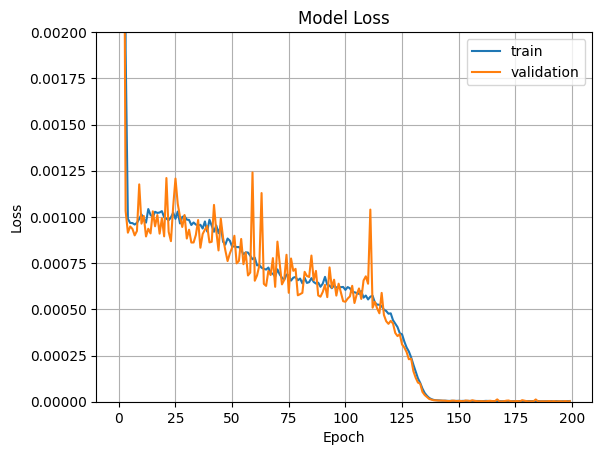

4/4 [==============================] - 0s 769us/step
loss for I: 0.014690476469695568 
loss for Q: 0.010188459418714046


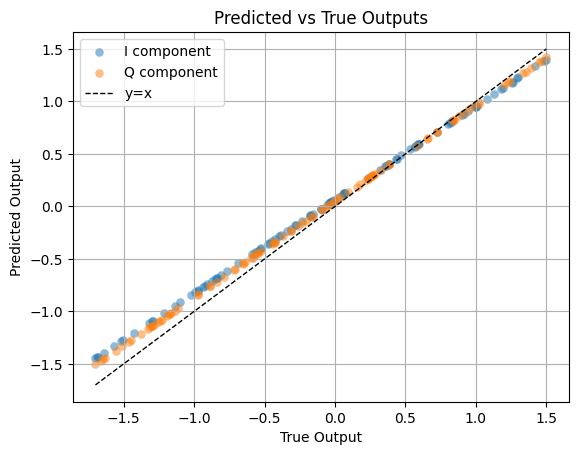

In [131]:
plt.plot(history_sigm.history['loss'], label='train')
plt.plot(history_sigm.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 0.002])
plt.grid()
plt.show()

# Test on new data
X_test, y_test = generate_data_normalized(100)  # Generate test data
predictions = model_sigm.predict(X_test)
X_test, y_test = data_invert_norm(X_test, y_test)
_, predictions = data_invert_norm(X_test, predictions)

lossI = keras.losses.mean_squared_error(y_test[:, 0], predictions[:, 0])
lossQ = keras.losses.mean_squared_error(y_test[:, 1], predictions[:, 1])
print('loss for I:', float(lossI),'\nloss for Q:', float(lossQ))

# Compare predictions with actual outputs
plt.scatter(y_test[:, 0], predictions[:, 0], linewidths=0.1, label='I component', alpha=0.5)
plt.scatter(y_test[:, 1], predictions[:, 1], linewidths=0.1, label='Q component', alpha=0.5)
plt.plot([-1.7, 1.5], [-1.7, 1.5], 'k--', linewidth=1, label='y=x')
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Predicted vs True Outputs')
plt.legend()
plt.grid()
plt.show()

In [147]:
epochs_list = [50, 100, 120, 150, 170, 200]
batch_size_list = [16, 32, 64, 128, 256, 512]

X, y = generate_data(10000)
X_test, y_test = generate_data(1000)

print('RELU MODEL')
print('epoch   |batch_size|\t loss for I \t\t|\t loss for Q')
for epochs in epochs_list:
    for batch_size in batch_size_list:
        model_relu.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
        predictions = model_relu.predict(X_test, verbose=0)
        lossI = keras.losses.mean_squared_error(y_test[:, 0], predictions[:, 0])
        lossQ = keras.losses.mean_squared_error(y_test[:, 1], predictions[:, 1])
        print(epochs,'\t| ', batch_size, '\t   | ',  float(lossI), '\t| ', float(lossQ))


print('------------------------------------------------\nSIGMOID MODEL')
print('epoch   |batch_size|\t loss for I \t\t|\t loss for Q')
X_sigm, y_sigm = generate_data_normalized(10000)
X_sigm_test, y_sigm_test = generate_data_normalized(1000)

for epochs in epochs_list:
    for batch_size in batch_size_list:
        model_sigm.fit(X_sigm, y_sigm, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
        predictions = model_sigm.predict(X_sigm_test, verbose=0)
        lossI = keras.losses.mean_squared_error(y_sigm_test[:, 0], predictions[:, 0])
        lossQ = keras.losses.mean_squared_error(y_sigm_test[:, 1], predictions[:, 1])
        print(epochs,'\t| ', batch_size, '\t   | ',  float(lossI), '\t| ', float(lossQ))
        

RELU MODEL
epoch   |batch_size|	 loss for I 		|	 loss for Q
50 	|  16 	   |  4.775515662913676e-06 	|  3.072752861044137e-06
50 	|  32 	   |  2.3227873953146627e-06 	|  1.7069363593691378e-06
50 	|  64 	   |  3.118114591416088e-06 	|  1.449943056286429e-06
50 	|  128 	   |  1.435805302207882e-06 	|  1.0161779755435418e-06
50 	|  256 	   |  1.3050148481852375e-06 	|  1.6594685803283937e-06
50 	|  512 	   |  1.1606414318521274e-06 	|  8.25338418053434e-07
100 	|  16 	   |  3.242151024096529e-06 	|  5.220174898568075e-06
100 	|  32 	   |  4.325379904912552e-06 	|  2.618308371893363e-06
100 	|  64 	   |  1.41318014357239e-05 	|  1.381665811095445e-06
100 	|  128 	   |  2.088197561533889e-06 	|  1.1198485481145326e-06
100 	|  256 	   |  1.8156009673475637e-06 	|  2.1519101665035123e-06
100 	|  512 	   |  1.288132125409902e-06 	|  2.932637471531052e-06
120 	|  16 	   |  8.80166953720618e-06 	|  1.2977818187209778e-05
120 	|  32 	   |  5.0911780817841645e-06 	|  7.695941349084023e-06
120 	|  

In [ ]:
'adam', 'sgd', 'rmsprop', 'adamw', 'adabound':
            
            


1. First, we will start by loading and viewing the dataset.
2. We will analyze the dataset for numerical and non-numerical values, if it contains values between different ranges and if it has any missing values.
3. We will then preprocess the dataset to ensure that we are only feeding numerical values to the machine learning model for predicitons.
4. Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted or not.
5. Source: Datacamp Project
6. I have extended the project by including visualizations and correlation analysis. 

In [ ]:
def get_amplitude(IQ_signal):
        I = IQ_signal[:, 0]
        Q = IQ_signal[:, 1]
        power = I ** 2 + Q ** 2
        amplitude = np.sqrt(power)
        return amplitude

In [160]:

import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset


def load_dataset(dataset_name):
    path_dataset = os.path.join('datasets', dataset_name)
    X_train = pd.read_csv(os.path.join(path_dataset, 'train_input.csv')).to_numpy()
    y_train = pd.read_csv(os.path.join(path_dataset, 'train_output.csv')).to_numpy()
    X_val = pd.read_csv(os.path.join(path_dataset, 'val_input.csv')).to_numpy()
    y_val = pd.read_csv(os.path.join(path_dataset, 'val_output.csv')).to_numpy()
    X_test = pd.read_csv(os.path.join(path_dataset, 'test_input.csv')).to_numpy()
    y_test = pd.read_csv(os.path.join(path_dataset, 'test_output.csv')).to_numpy()
    return X_train, y_train, X_val, y_val, X_test, y_test


def prepare_segments(args):
    """
    Split the IQ_data into segments of size nperseg. Zero padding is applied
    if the last section is not of length nperseg.
    """
    nperseg = args.nperseg
    path_dataset = os.path.join('datasets', args.dataset_name)
    train_input = pd.read_csv(os.path.join(path_dataset, 'train_input.csv'))
    train_output = pd.read_csv(os.path.join(path_dataset, 'train_output.csv'))
    val_input = pd.read_csv(os.path.join(path_dataset, 'val_input.csv'))
    val_output = pd.read_csv(os.path.join(path_dataset, 'val_output.csv'))
    test_input = pd.read_csv(os.path.join(path_dataset, 'test_input.csv'))
    test_output = pd.read_csv(os.path.join(path_dataset, 'test_output.csv'))

    def split_segments(IQ_data):
        num_samples = IQ_data.shape[0]
        segments = []
        for i in range(0, num_samples, nperseg):
            segment = IQ_data[i:i + nperseg]
            if segment.shape[0] < nperseg:
                padding_shape = (nperseg - segment.shape[0], 2)
                segment = torch.vstack((segment, torch.zeros(padding_shape)))
            segments.append(segment)
        return np.array(segments)

    train_input_segments = split_segments(train_input)
    train_output_segments = split_segments(train_output)
    val_input_segments = split_segments(val_input)
    val_output_segments = split_segments(val_output)
    test_input_segments = split_segments(test_input)
    test_output_segments = split_segments(test_output)

    return train_input_segments, train_output_segments, val_input_segments, val_output_segments, test_input_segments, test_output_segments


def get_training_frames(segments, seq_len, stride=1):
    """
    For each segment, apply the framing operation.

    Args:
    - segments (3D array): The segments produced by get_ofdm_segments.
    - seq_len (int): The length of each frame.
    - stride_length (int, optional): The step between frames. Default is 1.

    Returns:
    - 3D array where the first dimension is the total number of frames,
      the second dimension is seq_len, and the third dimension is 2 (I and Q).
    """

    all_frames = []
    for segment in segments:
        num_frames = (segment.shape[0] - seq_len) // stride + 1
        for i in range(num_frames):
            frame = segment[i * stride: i * stride + seq_len]
            all_frames.append(frame)

    return np.array(all_frames)


class IQSegmentDataset(Dataset):
    def __init__(self, features, targets, nperseg=16384):
        self.nperseg = nperseg

        features = self.split_segments(features)
        targets = self.split_segments(targets)
        self.features = torch.Tensor(features)
        self.targets = torch.Tensor(targets)

    def split_segments(self, sequence):
        num_samples = len(sequence)
        segments = []
        for i in range(0, num_samples, self.nperseg):
            segment = sequence[i:i + self.nperseg]
            if len(segment) < self.nperseg:
                padding_shape = (self.nperseg - segment.shape[0], 2)
                segment = torch.vstack((segment, torch.zeros(padding_shape)))
            segments.append(segment)
        return np.array(segments)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = self.features[idx, ...]
        targets = self.targets[idx, ...]
        return features, targets


class IQFrameDataset(Dataset):
    def __init__(self, features, targets, frame_length, stride=1):
        # Convert segments into frames
        self.features = torch.Tensor(self.get_frames(features, frame_length, stride))
        self.targets = torch.Tensor(self.get_frames(targets, frame_length, stride))

    @staticmethod
    def get_frames(sequence, frame_length, stride_length):
            frames = []
            sequence_length = len(sequence)
            num_frames = (sequence_length - frame_length) // stride_length + 1
            for i in range(num_frames):
                frame = sequence[i * stride_length: i * stride_length + frame_length]
                frames.append(frame)
            return np.stack(frames)
    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]


def data_prepare(X, y, frame_length, degree):
    Input = []
    Output = []
    X = torch.Tensor(X)
    y = torch.Tensor(y)
    for k in range(X.shape[0]):
        Complex_In = torch.complex(X[k, :, 0], X[k, :, 1])
        Complex_Out = torch.complex(y[k, :, 0], y[k, :, 1])
        ulength = len(Complex_In) - frame_length
        Input_matrix = torch.complex(torch.zeros(ulength, frame_length),
                                     torch.zeros(ulength, frame_length))
        degree_matrix = torch.complex(torch.zeros(ulength - frame_length, frame_length * frame_length * degree),
                                      torch.zeros(ulength - frame_length, frame_length * frame_length * degree))
        for i in range(ulength):
            Input_matrix[i, :] = Complex_In[i:i + frame_length]
        for j in range(1, degree):
            for h in range(frame_length):
                degree_matrix[:,
                (j - 1) * frame_length * frame_length + h * frame_length:(j - 1) * frame_length * frame_length + (
                        h + 1) * frame_length] = Input_matrix[:ulength - frame_length] * torch.pow(
                    abs(Input_matrix[h:h + ulength - frame_length, :]), j)
        Input_matrix = torch.cat((Input_matrix[:ulength - frame_length], degree_matrix), dim=1)
        b_output = np.array(Complex_Out[:len(Complex_In) - 2 * frame_length])
        b_input = np.array(Input_matrix)
        Input.append(b_input)
        Output.append(b_output)

    return Input, Output


class IQFrameDataset_gmp(Dataset):
    def __init__(self, segment_dataset, frame_length, degree, stride_length=1):
        """
        Initialize the frame dataset using a subset of IQSegmentDataset.

        Args:
        - segment_dataset (IQSegmentDataset): The pre-split segment dataset.
        - seq_len (int): The length of each frame.
        - stride_length (int, optional): The step between frames. Default is 1.
        """

        # Extract segments from the segment_dataset
        IQ_in_segments = [item[0] for item in segment_dataset]
        IQ_out_segments = [item[1] for item in segment_dataset]

        # Convert the list of tensors to numpy arrays
        IQ_in_segments = torch.stack(IQ_in_segments).numpy()
        IQ_out_segments = torch.stack(IQ_out_segments).numpy()

        self.IQ_in_frames, self.IQ_out_frames = data_prepare(IQ_in_segments, IQ_out_segments, frame_length, degree)

    def __len__(self):
        return len(self.IQ_in_frames)

    def __getitem__(self, idx):
        return self.IQ_in_frames[idx], self.IQ_out_frames[idx]

def build_dataloaders(self):
        # Load Dataset
        X_train, y_train, X_val, y_val, X_test, y_test = load_dataset(dataset_name=self.dataset_name)

        # Apply the PA Gain if training DPD
        self.target_gain = set_target_gain(X_train, y_train)
        if self.step == 'train_dpd':
            y_train = self.target_gain * X_train
            y_val = self.target_gain * X_val
            y_test = self.target_gain * X_test

        # Extract Features
        input_size = X_train.shape[-1]

        # Define PyTorch Datasets
        train_set = IQFrameDataset(X_train, y_train, frame_length=self.frame_length, stride=self.frame_stride)
        val_set = IQSegmentDataset(X_val, y_val, nperseg=self.args.nperseg)
        test_set = IQSegmentDataset(X_test, y_test, nperseg=self.args.nperseg)

        # Define PyTorch Dataloaders
        train_loader = DataLoader(train_set, batch_size=self.batch_size, shuffle=True)
        val_loader = DataLoader(val_set, batch_size=self.batch_size_eval, shuffle=False)
        test_loader = DataLoader(test_set, batch_size=self.batch_size_eval, shuffle=False)

        return (train_loader, val_loader, test_loader), input_size


In [ ]:
loss for I: 0.014690476469695568 
loss for Q: 0.010188459418714046

Project Steps
1. Literature Review

    Study Relevant Papers: Begin by thoroughly reviewing the paper titled "Convolutional Neural Network for Behavioral Modeling and Predistortion of Wideband Power Amplifiers" as well as other relevant literature on neural networks in predistortion.
    Identify Key Concepts: Focus on understanding the architecture of neural networks used for predistortion, particularly the types of activation functions (ReLU, sigmoid) and their effects.

2. Define Project Objectives

    Objective: To create a neural network model that serves as a predistorter for HPAs and to evaluate how varying the activation function type and number of layers affects nonlinear noise suppression.

3. Data Collection

    Collect Data: Obtain datasets that represent the input-output characteristics of the high power amplifier you are modeling. This could involve measurements from experimental setups or simulations.
    Preprocess Data: Clean and preprocess the data to ensure it is suitable for training a neural network. This may include normalization and splitting into training, validation, and test sets.

4. Neural Network Design

    Choose Framework: Select a deep learning framework (e.g., TensorFlow, PyTorch) for implementing the neural network.
    Network Architecture:
        Input Layer: Design an input layer that matches the dimensions of your data.
        Hidden Layers: Experiment with different configurations:
            Vary the number of hidden layers (e.g., 1 to 5 layers).
            Choose between ReLU and sigmoid activation functions for each layer.
        Output Layer: Design an output layer that predicts the desired output (predistorted signal).

5. Implementation

    Code the Model: Write code to implement the neural network architecture. Below is a basic example in Python using TensorFlow:



6. Training the Model

    Train the Model: Train your model using the training dataset. Monitor performance using validation data to avoid overfitting.
    Hyperparameter Tuning: Adjust learning rates, batch sizes, and epochs based on performance metrics.

7. Simulation and Evaluation

    Run Simulations: After training, run simulations to evaluate how well your model predicts the predistorted signal.
    Compare Activation Functions: Analyze results from models using different activation functions (ReLU vs. sigmoid).
    Vary Network Depth: Compare results from networks with varying numbers of layers.

8. Analyze Results

    Performance Metrics: Use metrics such as Mean Squared Error (MSE) or Signal-to-Noise Ratio (SNR) to quantify performance.
    Visualization: Plot results to visualize how activation functions and network depth impact nonlinear noise suppression.

9. Documentation

    Document Findings: Compile your findings into a report detailing methodology, results, and conclusions drawn from simulations.
    Future Work Suggestions: Suggest areas for further research or improvements based on your findings.

10. Presentation

    Prepare a presentation summarizing your project objectives, methodology, results, and conclusions for stakeholders or academic review.


Motivation
High power amplifiers (HPAs) are critical components in communication systems, particularly in wireless transmission, where they amplify signals to transmit over long distances. However, HPAs often exhibit nonlinear behavior, leading to signal distortion and spectral regrowth, which can severely degrade the performance of communication systems. To mitigate these issues, digital predistortion (DPD) techniques are employed to linearize the amplifier's output by pre-processing the input signal. The advent of deep learning and neural networks presents new opportunities to enhance the effectiveness of DPD methods, enabling more accurate modeling of amplifier behavior and improved linearization performance.


Theory
The core principle behind predistortion is to apply a nonlinear transformation to the input signal that counteracts the nonlinearities introduced by the amplifier. This transformation can be modeled using various mathematical approaches, including Volterra series and polynomial models. However, these traditional methods may struggle with complex nonlinearities present in modern HPAs. Neural networks, particularly deep neural networks (DNNs), offer a flexible framework for modeling such nonlinear relationships due to their ability to learn complex functions from data. By training on input-output pairs from the amplifier, a neural network can learn to predict the necessary predistortion that will result in a linear output. Key components involved in this process include:

    Activation Functions: Non-linear functions such as ReLU (Rectified Linear Unit) and sigmoid are crucial for introducing non-linearity into the neural network. They enable the network to learn complex patterns and relationships within the data 3
    5
    .
    Loss Function: A loss function quantifies how well the neural network's predictions match the desired output. Common choices for DPD applications include Mean Squared Error (MSE) or custom loss functions designed to minimize distortion metrics.
    Training Process: The training involves adjusting the weights of the neural network through backpropagation based on the error calculated from the loss function.



Existing Methods of Solution

    Traditional DPD Techniques:
        Volterra Series: This method models nonlinear systems using a series expansion that captures both memory effects and nonlinearity but can become computationally intensive.
        Polynomial Models: These models use polynomial equations to approximate the amplifier's transfer characteristics but may not generalize well across different operating conditions.
    Neural Network Approaches:
        Direct Learning Architectures: These architectures directly model the relationship between input and output signals without intermediate transformations 2
        . However, they may require extensive training data.
        Indirect Learning Architectures (ILA): In ILA, separate networks are used to model amplitude and phase distortions, allowing for more targeted corrections 2
        . This approach has shown improved performance over direct models.
        Walsh-Domain Neural Networks: Recent advancements have adapted neural networks to operate in alternative domains (e.g., Walsh domain), allowing for parallel processing and potentially enhanced performance in capturing time-frequency characteristics of signals 1
        .
    Meta-Learning Approaches:
        Recent studies have explored meta-learning techniques that allow neural networks to adapt quickly to changing conditions in HPAs, enhancing their robustness and efficiency 2
        . This involves training models on multiple tasks or configurations simultaneously, enabling them to generalize better across different scenarios.
    Knowledge Distillation:
        A novel approach involves using a pre-trained model (teacher) to guide a simpler model (student) through a process known as Knowledge Distillation. This technique allows for efficient learning by transferring knowledge from a complex model to a more streamlined one without significant loss in performance 1
        .